In [1]:
# Load CSV data

# Setup
import pandas as pd
import numpy as np

# Make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [3]:
# In memory data

abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/" \
    "data/abalone_train.csv",
    names=[
        "Length", "Diameter", "Height", "Whole weights", "Shucked weight",
        "Viscera weight", "Shell weight", "Age"
    ]
)

abalone_train.head()

,Length,Diameter,Height,Whole weights,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [5]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop("Age")

abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [6]:
# Make a regression model predict the age of abalones
abalone_model = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

# Train the model
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 66.4420
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 12.8883
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 8.8620
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 8.3189
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 7.8520
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 7.4445
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 7.1435
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 6.9343
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 6.7732
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 6.6473


In [7]:
# Basic preprocessing
# Adopt the normalization
normalize = layers.Normalization()
normalize.adapt(abalone_features)

norm_abalone_model = tf.keras.Sequential([
    normalize,  # Insert the normalize layer
    layers.Dense(64),
    layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 93.0000
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 54.2728
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 17.1954
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 5.9696
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0717
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9862
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9642
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9438
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9312
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9269


In [8]:
# Mixed data types
# The "Titanic" dataset
titanic = pd.read_csv(
    "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
)
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [9]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop("survived")

In [10]:
# Preprocessing with the Keras functional API
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2 * input + 1

# The result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [11]:
calc = tf.keras.Model(inputs=input, outputs=result)

print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


In [12]:
inputs = {}

for name, column in titanic_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32

    # Build a set of symbolic `tf.keras.Input` object,
    # matching the names and data-types of the CSV columns
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [14]:
numeric_inputs = {
    name: input for name, input in inputs.items() if input.dtype == tf.float32
}

# Concatenate the numeric inputs together
x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_2')>

In [15]:
preprocessed_inputs = [all_numeric_inputs]

In [16]:
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue

    # Map from string to integer indices in a vocabulary
    lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
    # Convert the indices into float32 data appropriate for the model
    one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    x = lookup(input)
    x = one_hot(x)

    preprocessed_inputs.append(x)

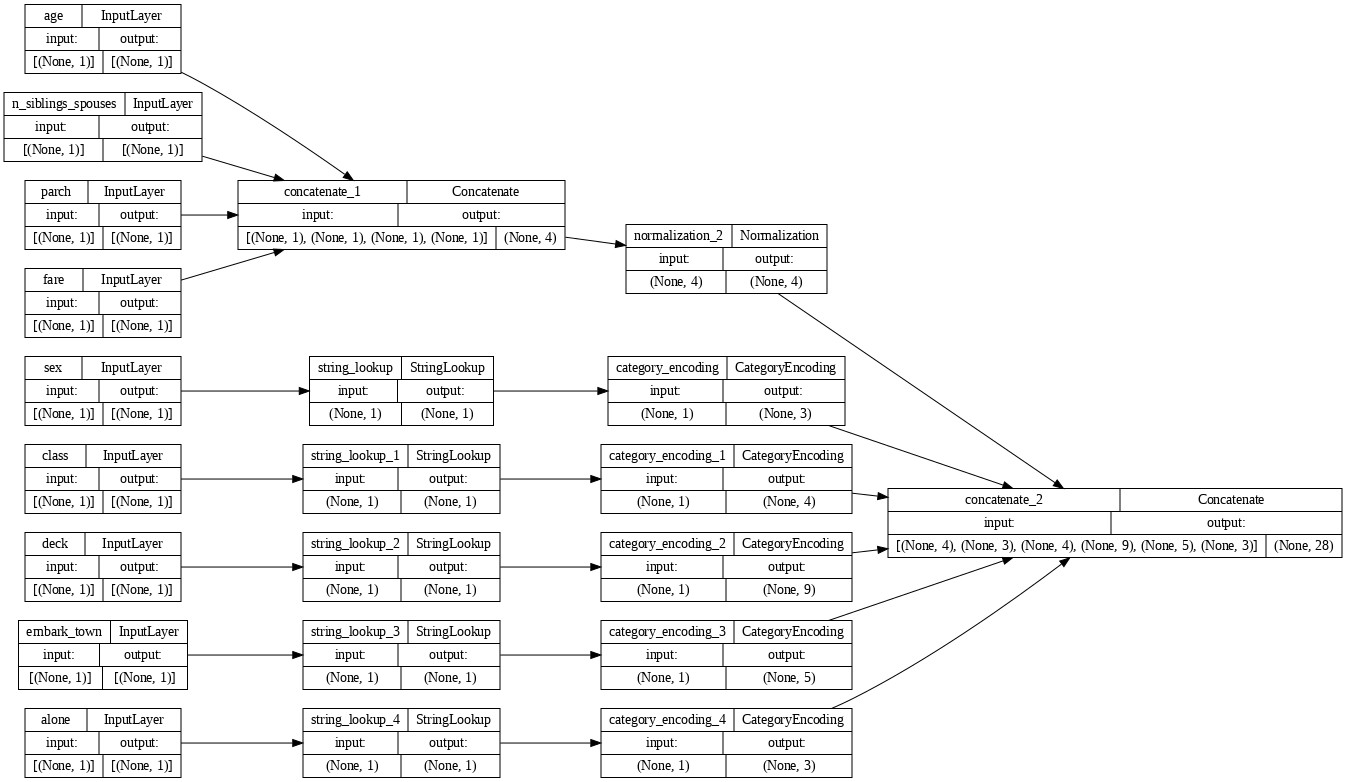

In [17]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

# Plot a model structure
tf.keras.utils.plot_model(
    model = titanic_preprocessing, rankdir="LR", dpi=72, show_shapes=True
)

In [18]:
titanic_features_dict = {
    name: np.array(value) for name, value in titanic_features.items()
}

# Pass the first training example to the preprocessing model
features_dict = {
    name: values[:1] for name, values in titanic_features_dict.items()
}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [19]:
# Build a model with the preprocessing
def titanic_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([
        layers.Dense(64),
        layers.Dense(1)
    ])

    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam())

    return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 4ms/step - loss: 0.5765
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5079
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4747
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4516
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4377
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4305
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4273
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4228
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4212
Epoch 10/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4206


In [20]:
titanic_model.save("test")
reloaded = tf.keras.models.load_model("test")

In [21]:
features_dict = {
    name: values[:1] for name, values in titanic_features_dict.items()
}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before - after) < 1e-3
print(before)
print(after)

tf.Tensor([[-1.948]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.948]], shape=(1, 1), dtype=float32)


In [22]:
# Using tf.data
import itertools

# Slice up the dictionary of features
def slices(features):
    for i in itertools.count():
        # For each features take index `i`
        example = {name: values[-1] for name, values in features.items()}
        yield example

# Print the first example
for example in slices(titanic_features_dict):
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : male
age                : 32.0
n_siblings_spouses : 0
parch              : 0
fare               : 7.75
class              : Third
deck               : unknown
embark_town        : Queenstown
alone              : y


In [23]:
# In-memory data loader: `Dataset.from_tensor_slices`
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

# Print the first example
for example in features_ds:
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [25]:
# Make a dataset of (features_dict, labels) pairs
titanic_ds = tf.data.Dataset.from_tensor_slices(
    (titanic_features_dict, titanic_labels)
)

# Get a batch
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

# Train the model
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 [==============================] - 1s 4ms/step - loss: 0.4187
Epoch 2/5
20/20 [==============================] - 0s 5ms/step - loss: 0.4198
Epoch 3/5
20/20 [==============================] - 0s 5ms/step - loss: 0.4188
Epoch 4/5
20/20 [==============================] - 0s 6ms/step - loss: 0.4202
Epoch 5/5
20/20 [==============================] - 0s 9ms/step - loss: 0.4191


In [26]:
# From a single file
titanic_file_path = tf.keras.utils.get_file(
    "train.csv",
    "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
)

30874/30874 [==============================] - 0s 0us/step


In [28]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artifically small to make examples easier to show
    label_name="survived",
    num_epochs=1, # Mandatory
    ignore_errors=True,
)

In [29]:
for batch, label in titanic_csv_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value}")
    print()
    print(f"{'label':20s}: {label}")

sex                 : [b'female' b'male' b'female' b'male' b'male']
age                 : [14. 16. 35. 66. 22.]
n_siblings_spouses  : [1 0 1 0 0]
parch               : [2 0 0 0 0]
fare                : [120.    10.5   53.1   10.5    9.35]
class               : [b'First' b'Second' b'First' b'Second' b'Third']
deck                : [b'B' b'unknown' b'C' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Southampton'
 b'Southampton']
alone               : [b'n' b'y' b'n' b'y' b'y']

label               : [1 0 1 0 0]


In [31]:
# The metro interstate traffic dataset
traffic_volume_csv_gz = tf.keras.utils.get_file(
    "Metro_Interstate_Traffic_Volume.csv.gz",
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/" \
    "Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir=".", cache_subdir="traffic"
)

   8192/Unknown - 0s 0us/step

In [32]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name="traffic_volume",
    num_epochs=1,
    compression_type="GZIP"
)

for batch, label in traffic_volume_csv_gz_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value[:5]}")
    print()
    print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [290.57 299.68 292.3  272.24 279.24]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [90 68 75 90  1]
weather_main        : [b'Rain' b'Clouds' b'Clouds' b'Snow' b'Clear']
weather_description : [b'moderate rain' b'broken clouds' b'broken clouds' b'heavy snow'
 b'sky is clear']
date_time           : [b'2013-05-21 09:00:00' b'2013-08-21 11:00:00' b'2013-06-01 21:00:00'
 b'2012-12-10 01:00:00' b'2012-11-16 18:00:00']

label               : [5094 5406 2902  268 5074]


In [35]:
# Caching
%%time

# Iterate the dataset 20 times without caching
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
    if i % 40 == 0:
        print(".", end="")
print()

...............................................................................................
CPU times: user 27.4 s, sys: 3.96 s, total: 31.3 s
Wall time: 27.3 s


In [36]:
%%time

# Iterate the dataset 20 times with caching by `Dataset.cache()`
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print(".", end="")
print()

...............................................................................................
CPU times: user 3.57 s, sys: 282 ms, total: 3.85 s
Wall time: 3.83 s


In [37]:
%%time

# Iterate the dataset 20 times with caching by `Dataset.snapshot()`
snapshotting = traffic_volume_csv_gz_ds.snapshot("titanic.tfsnap").shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print(".", end="")
print()

...............................................................................................
CPU times: user 4.25 s, sys: 409 ms, total: 4.65 s
Wall time: 5.24 s


In [39]:
# Multiple files
# The character font images dataset
fonts_zip = tf.keras.utils.get_file(
    "fonts.zip",
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir=".", cache_subdir="fonts",
    extract=True
)

   8192/Unknown - 0s 0us/step

In [40]:
import pathlib
font_csvs = sorted(str(p) for p in pathlib.Path("fonts").glob("*.csv"))

print(font_csvs[:10])
print(len(font_csvs))

['fonts/AGENCY.csv', 'fonts/ARIAL.csv', 'fonts/BAITI.csv', 'fonts/BANKGOTHIC.csv', 'fonts/BASKERVILLE.csv', 'fonts/BAUHAUS.csv', 'fonts/BELL.csv', 'fonts/BERLIN.csv', 'fonts/BERNARD.csv', 'fonts/BITSTREAMVERA.csv']
153


In [41]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=10, num_epochs=1,
    num_parallel_reads=20, # How many files are read in parallel and interleaved
                           # together
    shuffle_buffer_size=100000
)

# Print the first batch
for features in fonts_ds.take(1):
    for i, (name, value) in enumerate(features.items()):
        if i > 15:
            break
        print(f"{name:20s}: {value}")
    print("...")
    print(f"[total: {len(features)} features]") # The column names are formatted
                                                # `r{row}c{column}`

font                : [b'JAVANESE' b'YI BAITI' b'MONEY' b'HIMALAYA' b'SUPERFRENCH' b'COURIER'
 b'OCRA' b'RICHARD' b'CANDARA' b'NUMERICS']
fontVariant         : [b'JAVANESE TEXT' b'MICROSOFT YI BAITI' b'scanned' b'MICROSOFT HIMALAYA'
 b'SUPERFRENCH' b'COURIER NEW' b'scanned' b'POOR RICHARD' b'CANDARA'
 b'scanned']
m_label             : [43463 41768    56  4050 61473  7805    53    96   263    56]
strength            : [0.7 0.4 0.4 0.7 0.4 0.4 0.4 0.7 0.4 0.4]
italic              : [1 1 0 0 1 1 0 1 1 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [71 20  0 37 28 36  0 40 37  0]
m_left              : [27 41  0 24 22 27  0 44 23  0]
originalH           : [33 58 28 28 47 41 30 11 48 16]
originalW           : [23 35 16  9 19 36 16 11 27  8]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [  1   1   1 255   1   1   1   1   1   0]
r0c1                : [  1   1   1 255   1   1   1 

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 61570 (\uf082) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 61570 (\uf082) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


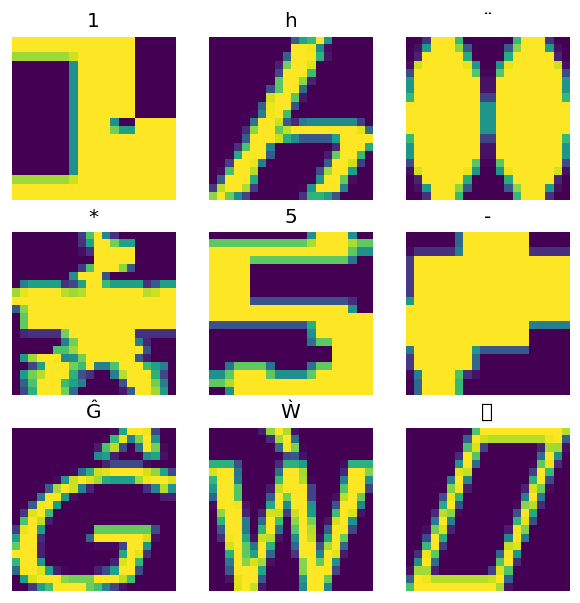

In [43]:
# Packing fields
import re

# Pack the pixels into an image-tensor
def make_images(features):
    image = [None] * 400
    new_feats = {}

    for name, value in features.items():
        matched = re.match("r(\d+)c(\d+)", name)
        if matched:
            image[int(matched.group(1)) * 20 + int(matched.group(2))] = value
        else:
            new_feats[name] = value

    image = tf.stack(image, axis=0)
    image = tf.reshape(image, [20, 20, -1])
    new_feats["image"] = image

    return new_feats


# Apply the function
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
    break

# Plot the resulting images
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
    plt.subplot(3, 3, n+1)
    plt.imshow(features["image"][..., n])
    plt.title(chr(features["m_label"][n]))
    plt.axis("off")

In [44]:
# Lower level functions

# tf.io.decode_csv: decodes a string or list of string into a list of columns
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split("\n")[1:-1]

# Read the Titanic data as strings
all_strings = [str()] * 10
features = tf.io.decode_csv(lines, record_defaults=all_strings)

for f in features:
    print(f"type: {f.dtype.name}, shape: {f.shape}")

# The first row
print(lines[0])

# Read the Titanic data as specified format types
titanic_types = [
    int(), str(), float(), int(), int(), float(), str(), str(), str(), str()
]
print(titanic_types)
features = tf.io.decode_csv(lines, record_defaults=titanic_types)

for f in features:
    print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
0,male,22.0,1,0,7.25,Third,unknown,Southampton,n
[0, '', 0.0, 0, 0, 0.0, '', '', '', '']
type: int32, shape: (627,)
type: string, shape: (627,)
type: float32, shape: (627,)
type: int32, shape: (627,)
type: int32, shape: (627,)
type: float32, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [45]:
# tf.data.experimental.CsvDataset: provide a minimal CSV Dataset interface
simple_titanic = tf.data.experimental.CsvDataset(
    titanic_file_path, record_defaults=titanic_types, header=True
)

for example in simple_titanic.take(1):
    print([e.numpy() for e in example])

# The above code is basically equivalent to:
# def decode_titanic_line(line):
#     return tf.io.decode_csv(line, titanic_types)
#
# manual_titanic = (
#     # Load the lines of text
#     tf.data.TextLineDataset(titanic_file_path)
#     # Skip the header row
#     .skip(1)
#     # Decode the line
#     .map(decode_titanic_line)
# )
#
# for example in manual_titanic.take(1):
#     print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [46]:
# Multiple files
# Check column types
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

In [47]:
num_font_features = font_line.count(",") + 1
font_column_types = [str(), str()] + [float()] * (num_font_features - 2)

# The list of input file is read sequentially
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs,
    record_defaults=font_column_types,
    header=True
)

# Files are:
# fonts/
#   AGENCY.csv
#   ARIAL.csv
#   BAITI.csv
#   ...
# therefore the records from `AGENCY.csv` are read first
for row in simple_font_ds.take(10):
    print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


In [50]:
# Read an initial dataset that contains CSV file names
font_files = tf.data.Dataset.list_files("fonts/*.csv")

print("Epoch 1:")
for f in list(font_files)[:5]:
    print("    ", f.numpy())
print("    ...")
print()

print("Epoch 2:")
for f in list(font_files)[:5]:
    print("    ", f.numpy())
print("    ...")
print()

Epoch 1:
     b'fonts/FOOTLIGHT.csv'
     b'fonts/CALISTO.csv'
     b'fonts/HAETTENSCHWEILER.csv'
     b'fonts/SCRIPTB.csv'
     b'fonts/BASKERVILLE.csv'
    ...

Epoch 2:
     b'fonts/BUXTON.csv'
     b'fonts/EUROROMAN.csv'
     b'fonts/RAVIE.csv'
     b'fonts/GARAMOND.csv'
     b'fonts/SNAP.csv'
    ...



In [55]:
def make_font_csv_ds(path):
    return tf.data.experimental.CsvDataset(
        path,
        record_defaults=font_column_types,
        header=True
    )

# Dataset.interleave: interleave multiple files
# return by interleave returns elements by cycling over a number of the child-
# Datasets
font_rows = font_files.interleave(make_font_csv_ds, cycle_length=3)

# The "character" column is dropped from the dataset?
# fonts_dict = {"font_name": [], "character": []}
fonts_dict = {"font_name": [], "m_label": []}

for row in font_rows.take(10):
    fonts_dict["font_name"].append(row[0].numpy().decode())
    # fonts_dict["character"].append(chr(row[2].numpy()))
    fonts_dict["m_label"].append(int(row[2].numpy()))

pd.DataFrame(fonts_dict)

,font_name,m_label
0,SIMPLEX,8962
1,MATURA,61442
2,FREESTYLE,61442
3,SIMPLEX,8804
4,MATURA,61441
5,FREESTYLE,61441
6,SIMPLEX,8734
7,MATURA,9674
8,FREESTYLE,9674
9,SIMPLEX,8722


In [56]:
# Performance
BATCH_SIZE = 2048

fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100
)

In [57]:
%%time

# Load 20, 2048-example batches with the built-in loader
for i, batch in enumerate(fonts_ds.take(20)):
    print(".", end="")

print()

....................
CPU times: user 35 s, sys: 3.09 s, total: 38.1 s
Wall time: 27.8 s


In [58]:
# Create batches of text lines
fonts_files = tf.data.Dataset.list_files("fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname: tf.data.TextLineDataset(fname).skip(1),
    cycle_length=100
).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(
    lambda x: tf.io.decode_csv(x, record_defaults=font_column_types)
)

In [59]:
%%time

# Load 20, 2048-example batches with passing the interleaved batch
for i, batch in enumerate(fonts_fast.take(20)):
    print(".", end="")

print()

....................
CPU times: user 4.63 s, sys: 57.4 ms, total: 4.68 s
Wall time: 2.7 s
